To do:

- agnes for log data, pca scaled, pca log
- k-means for no pca, pam for no pca (scaled and log)
- for each clustering algorithm: visualization (scatter), count table, confusion matrix
- nice dendrogram (ggdend: http://www.sthda.com/english/wiki/beautiful-dendrogram-visualizations-in-r-5-must-known-methods-unsupervised-machine-learning)


https://www.r-bloggers.com/2015/01/k-means-clustering-is-not-a-free-lunch/

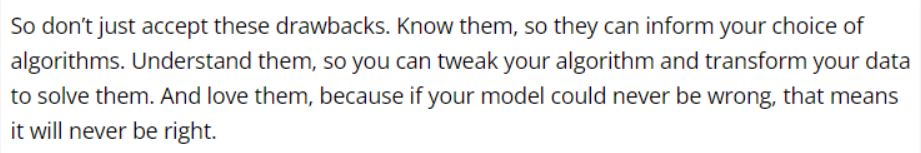


In [67]:
library(kernlab)
library(factoextra)
library(gridExtra)
library(grid)
library(ggfortify)
library(cluster)

In [2]:
data(spam)

In [3]:
head(spam)

,make,address,all,num3d,our,over,remove,internet,order,mail,⋯,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,spam
2,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,⋯,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,spam
3,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,⋯,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,spam
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,spam
5,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,spam
6,0.00,0.00,0.00,0,1.85,0.00,0.00,1.85,0.00,0.00,⋯,0.00,0.223,0,0.000,0.000,0.000,3.000,15,54,spam


In [3]:
spam <- spam[, -c(32, 34)]

In [4]:
spam_features <- spam[, 1:55]
log_data <- as.data.frame(log(spam_features+0.1))
spam_log <- cbind(log_data, spam[, 56, drop = FALSE])
scaled_data <- as.data.frame(scale(spam_features))
spam_scaled <- cbind(scaled_data, spam[, 56, drop = FALSE])

### PCA

In [5]:
pca <- prcomp(spam_features)
pca_scaled <- prcomp(scaled_data)
pca_log <- prcomp(log_data)

In [6]:
options(repr.plot.width = 13, repr.plot.height = 8)

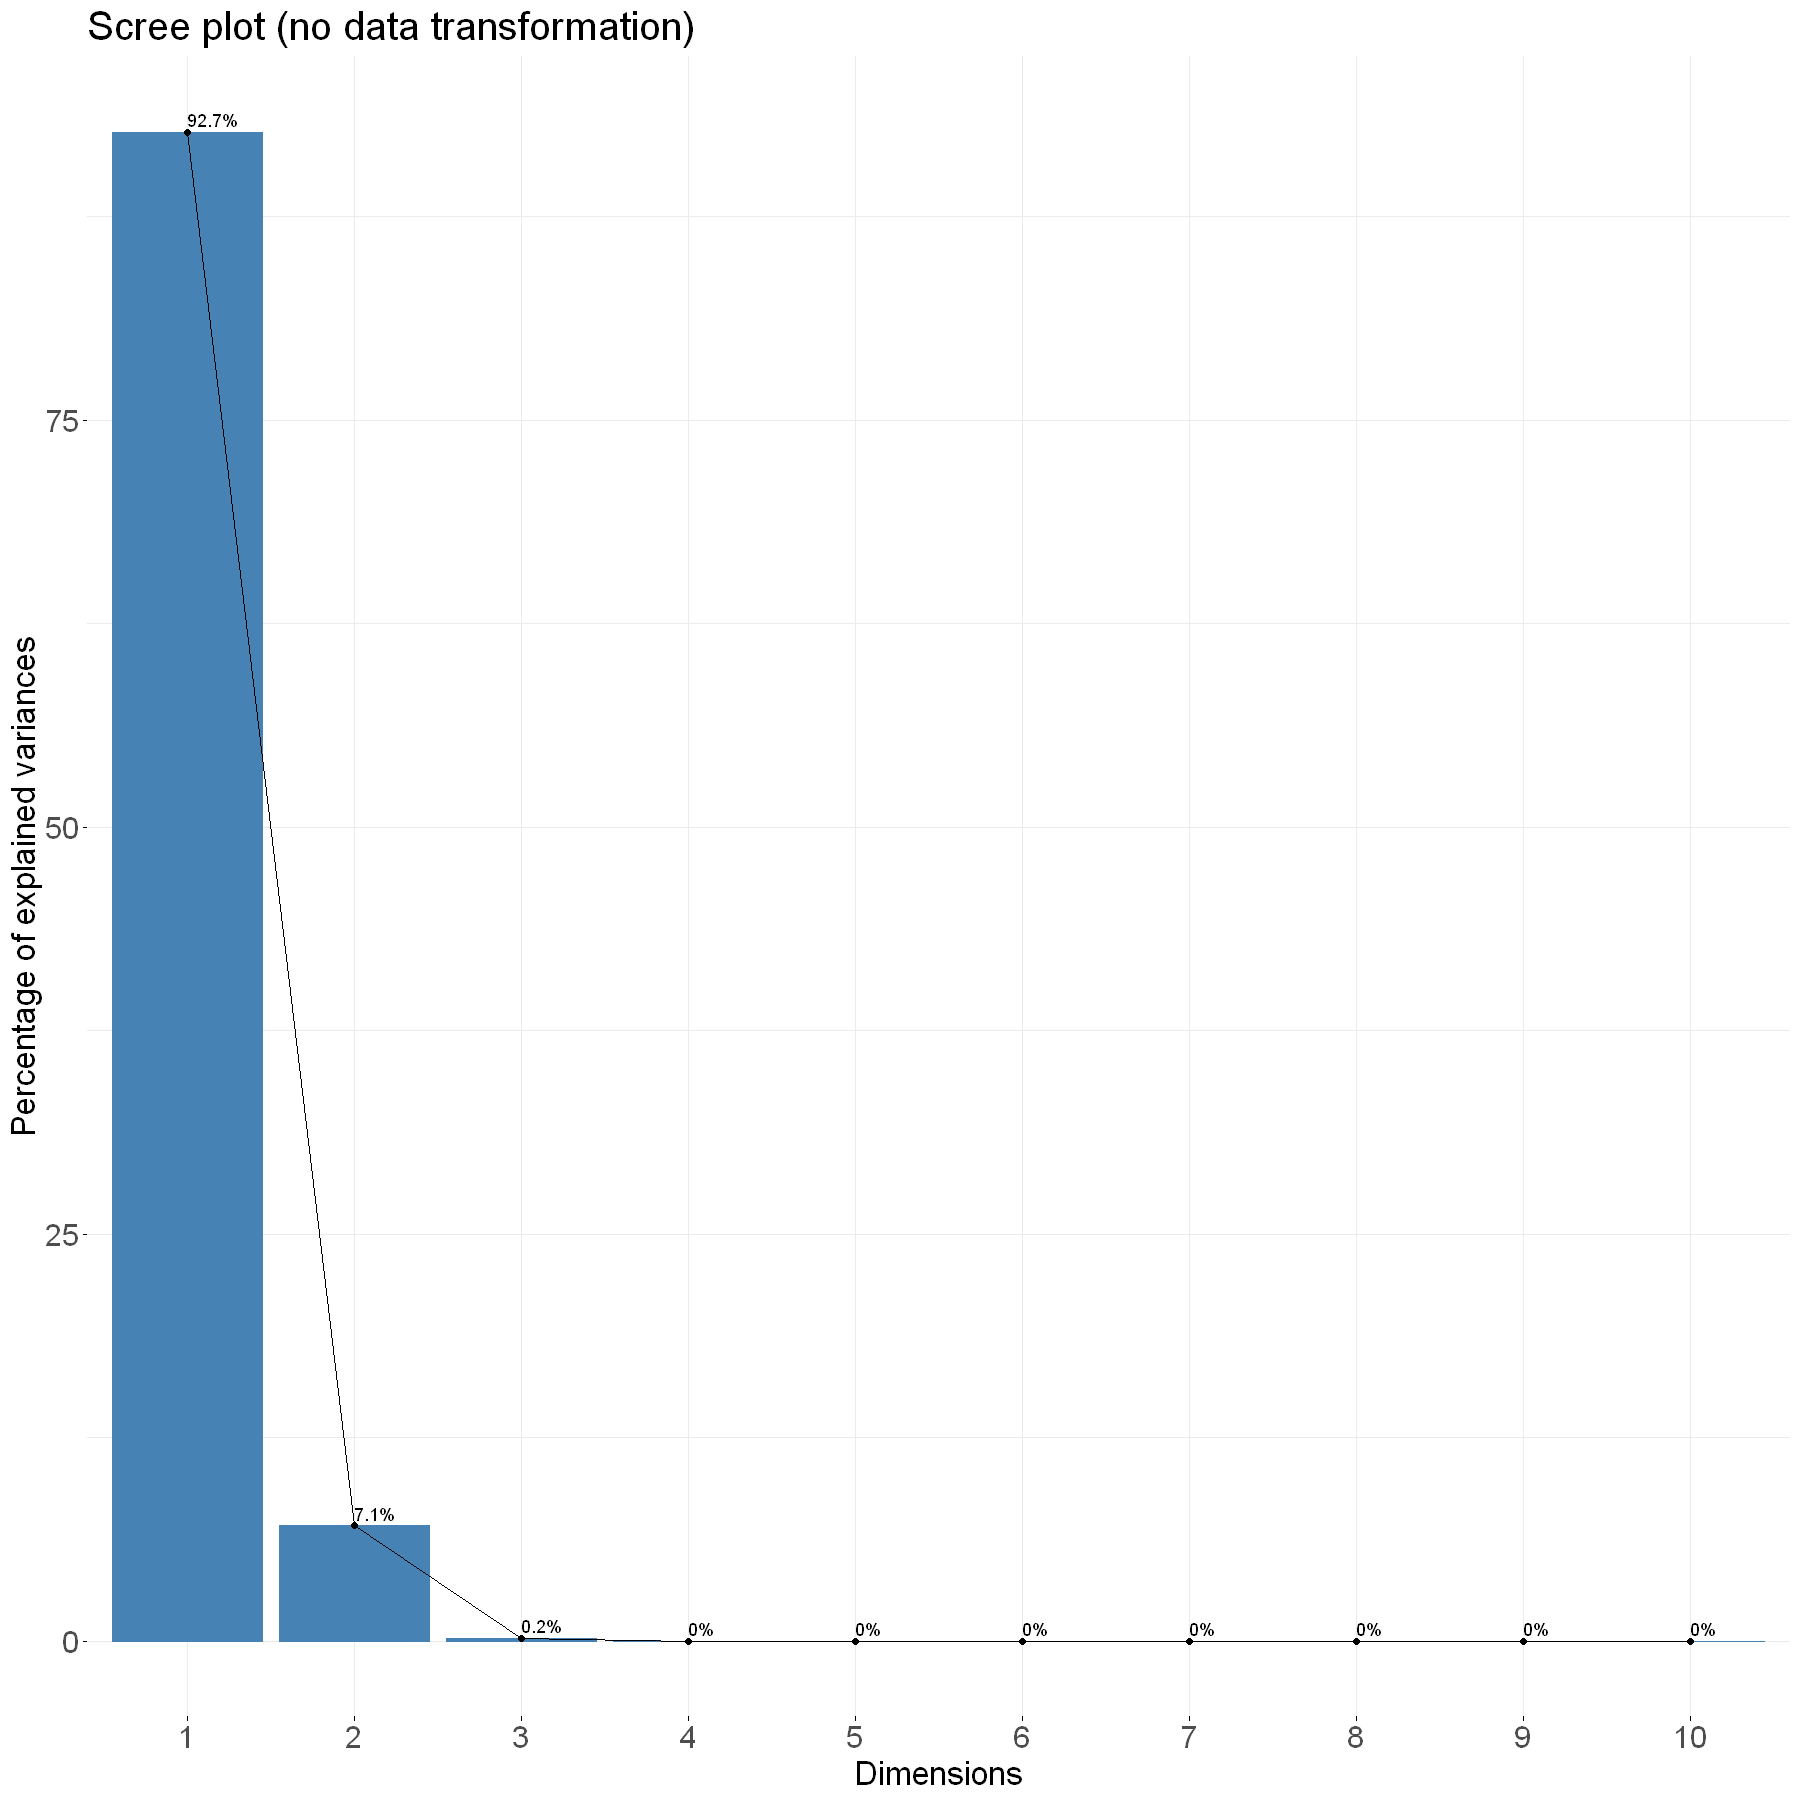

In [32]:
fviz_eig(pca, addlabels=TRUE) + 
    ggtitle("Scree plot (no data transformation)") +
    theme(
        plot.title = element_text(size = 24),
        axis.title = element_text(size = 20),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18))

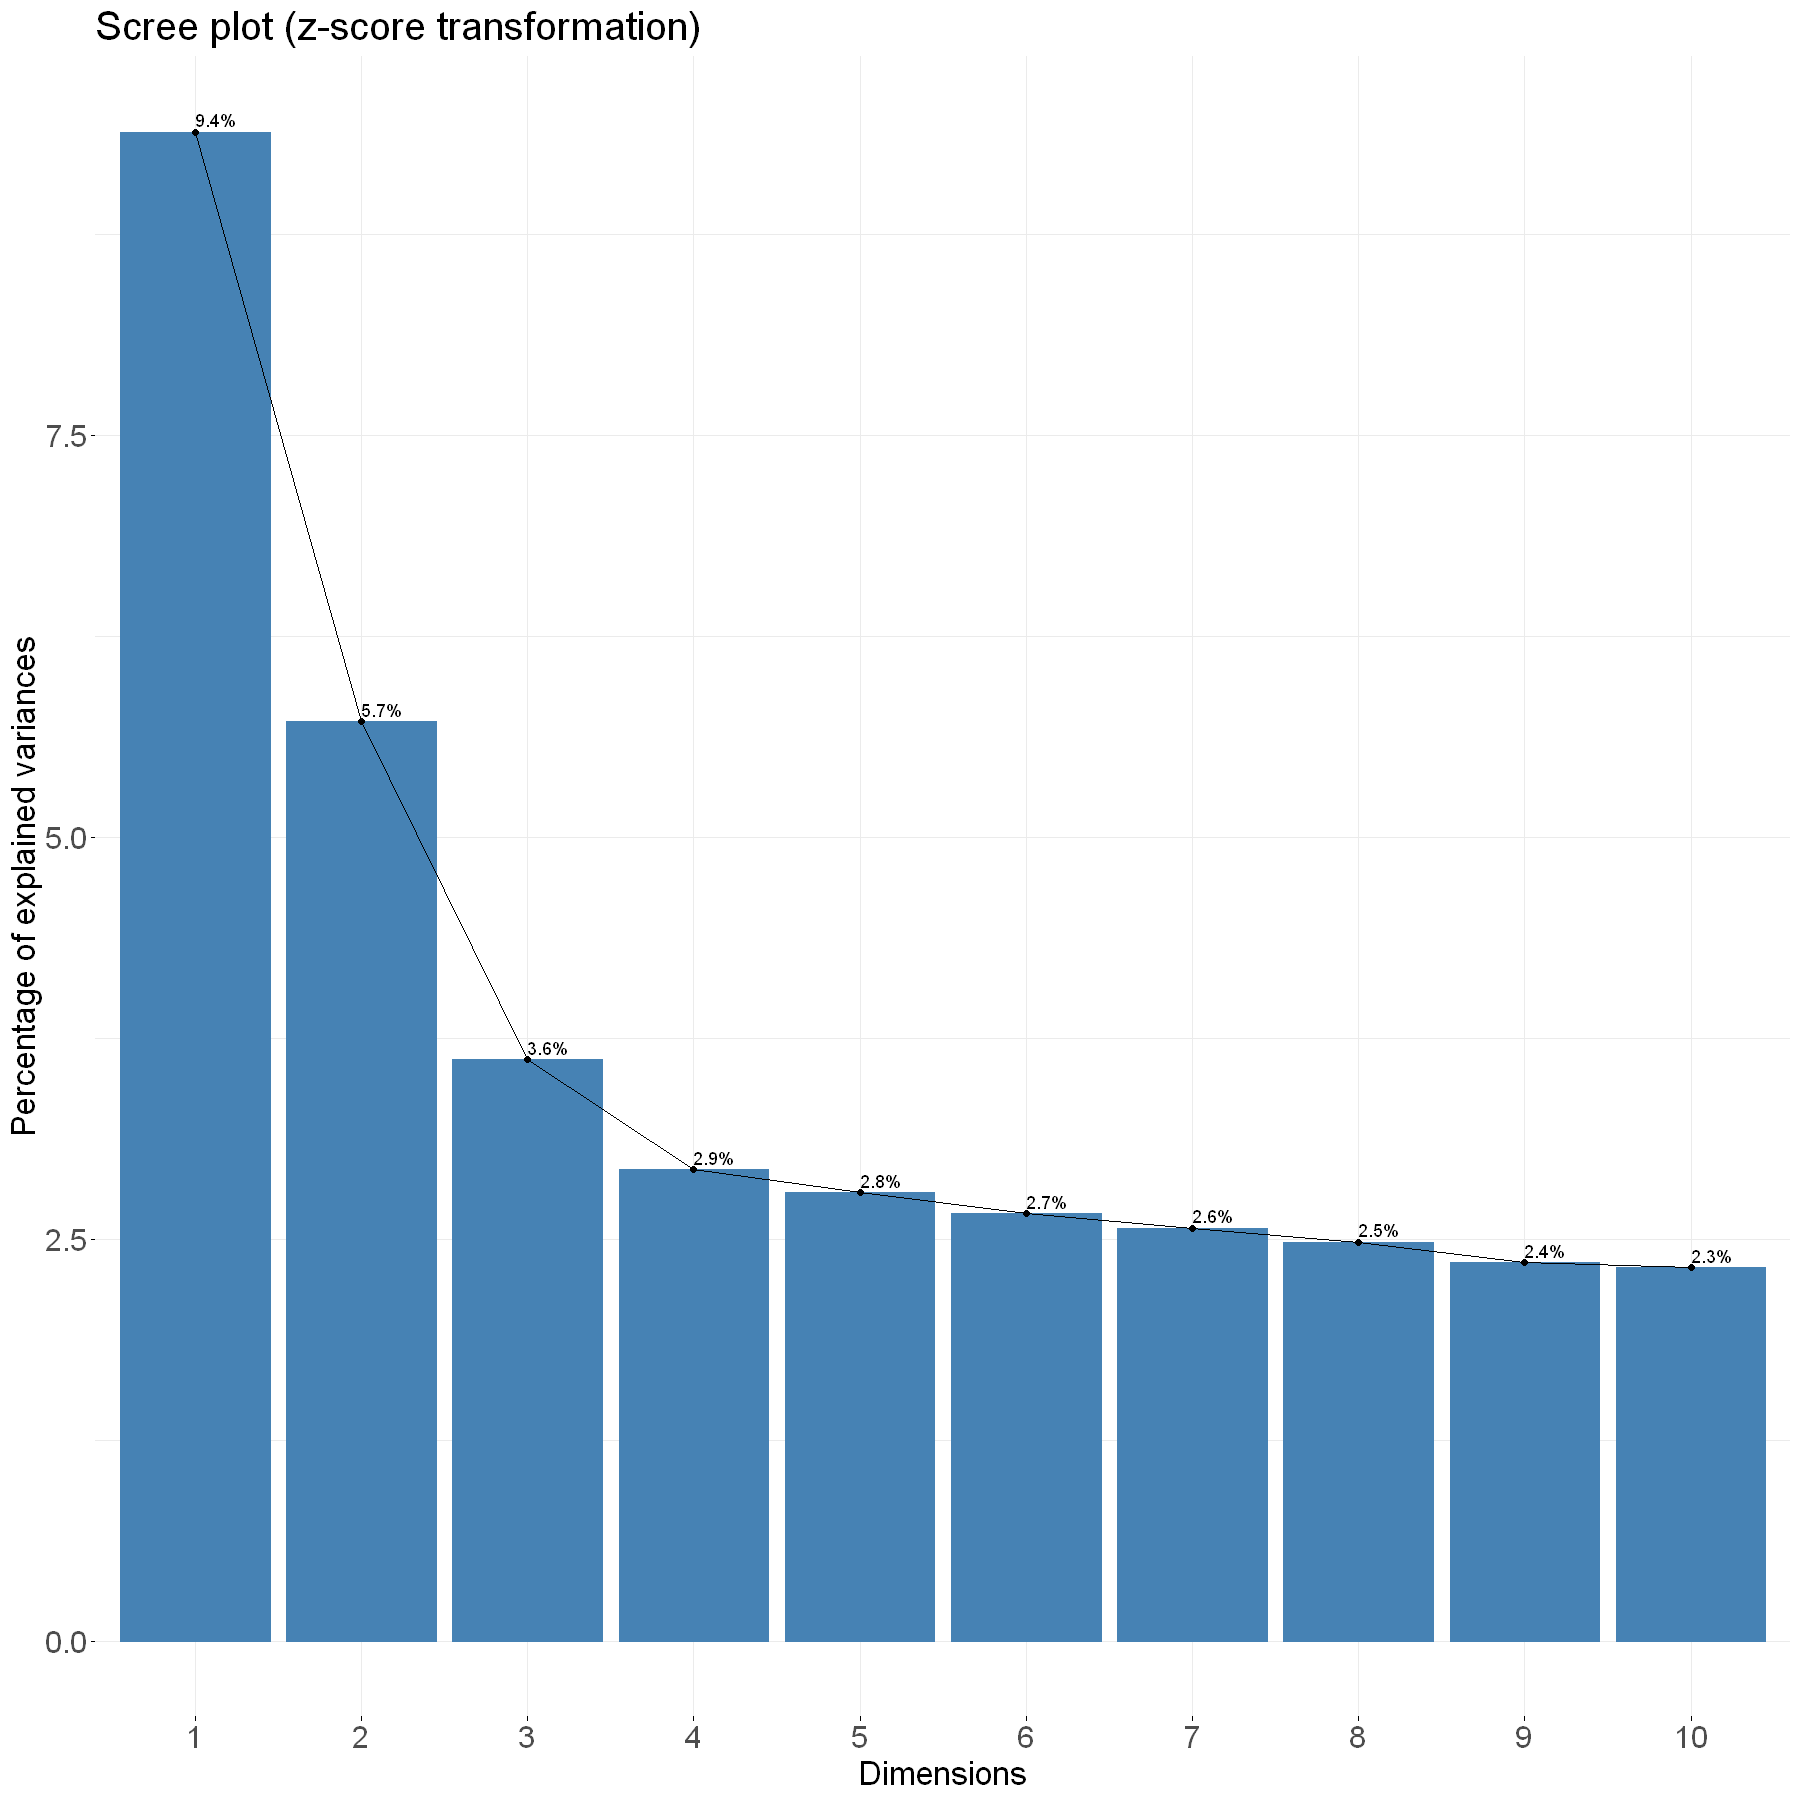

In [34]:
fviz_eig(pca_scaled, addlabels=TRUE) + 
    ggtitle("Scree plot (z-score transformation)") +
    theme(
        plot.title = element_text(size = 24),
        axis.title = element_text(size = 20),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18))

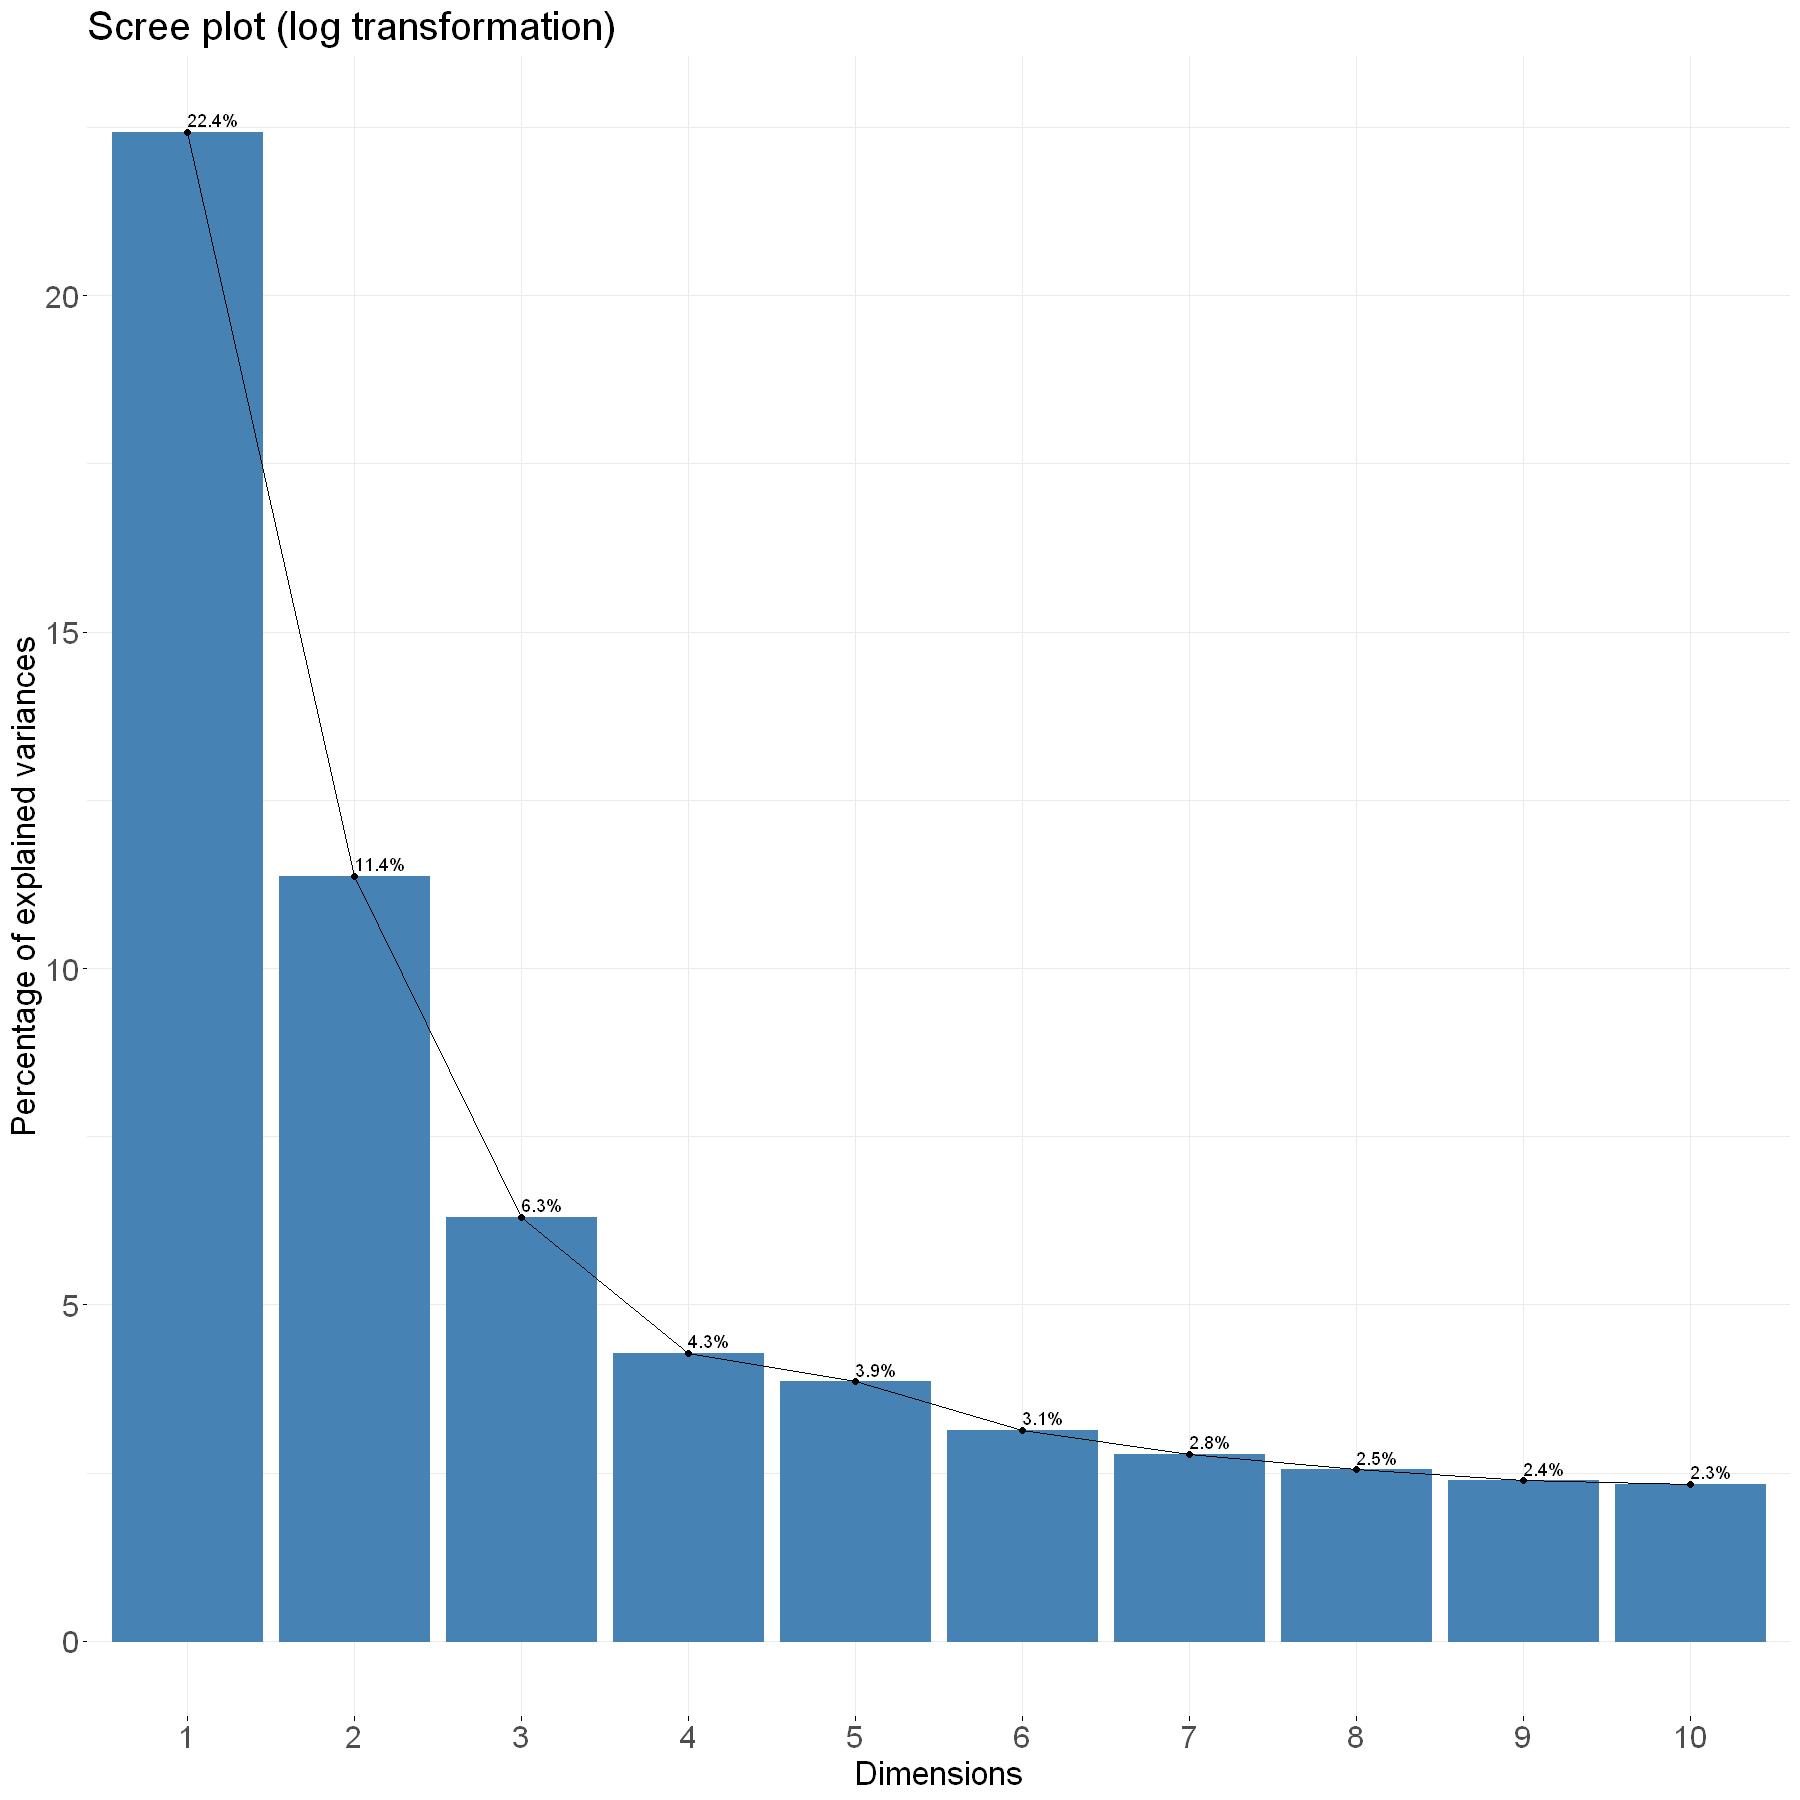

In [36]:
fviz_eig(pca_log, addlabels=TRUE) + 
    ggtitle("Scree plot (log transformation)") +
    theme(
        plot.title = element_text(size = 24),
        axis.title = element_text(size = 20),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18))

In [12]:
options(repr.plot.width = 15, repr.plot.height = 15)

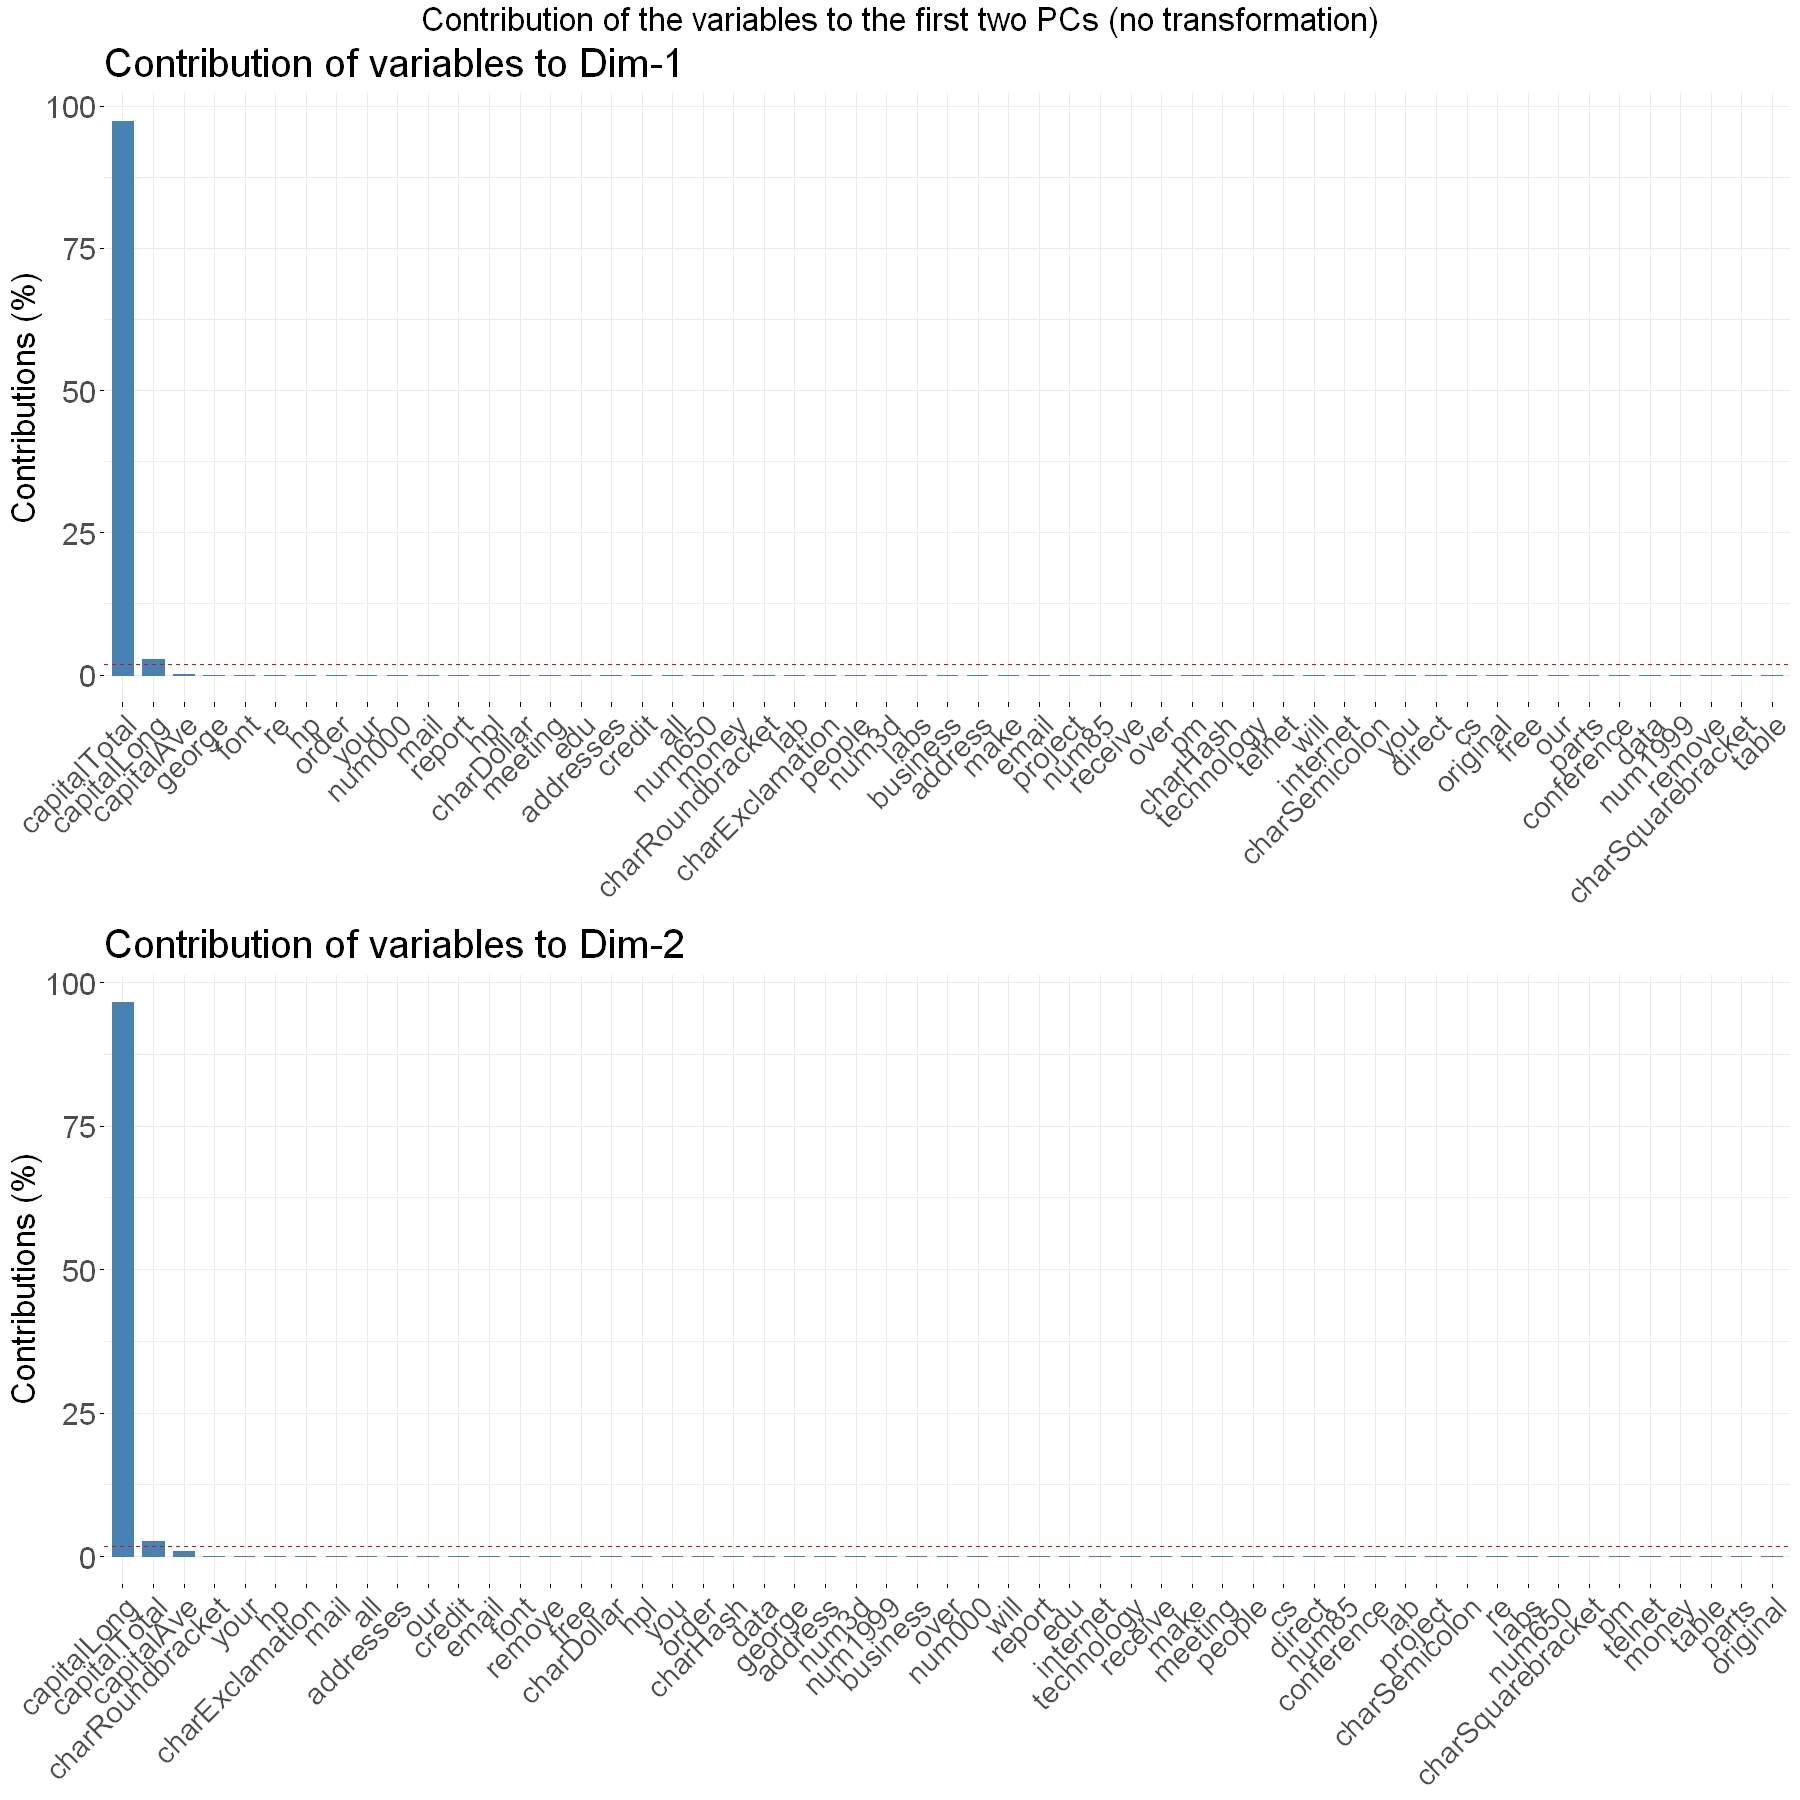

In [38]:
var1 <- fviz_contrib(pca, choice="var", axes=1) +
    theme(
        plot.title = element_text(size = 24),
        axis.title = element_text(size = 20),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18))
var2 <- fviz_contrib(pca, choice="var", axes=2) +
    theme(
        plot.title = element_text(size = 24),
        axis.title = element_text(size = 20),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18))
grid.arrange(var1, var2, ncol=1, top=textGrob("Contribution of the variables to the first two PCs (no transformation)", gp=gpar(fontsize=20)))

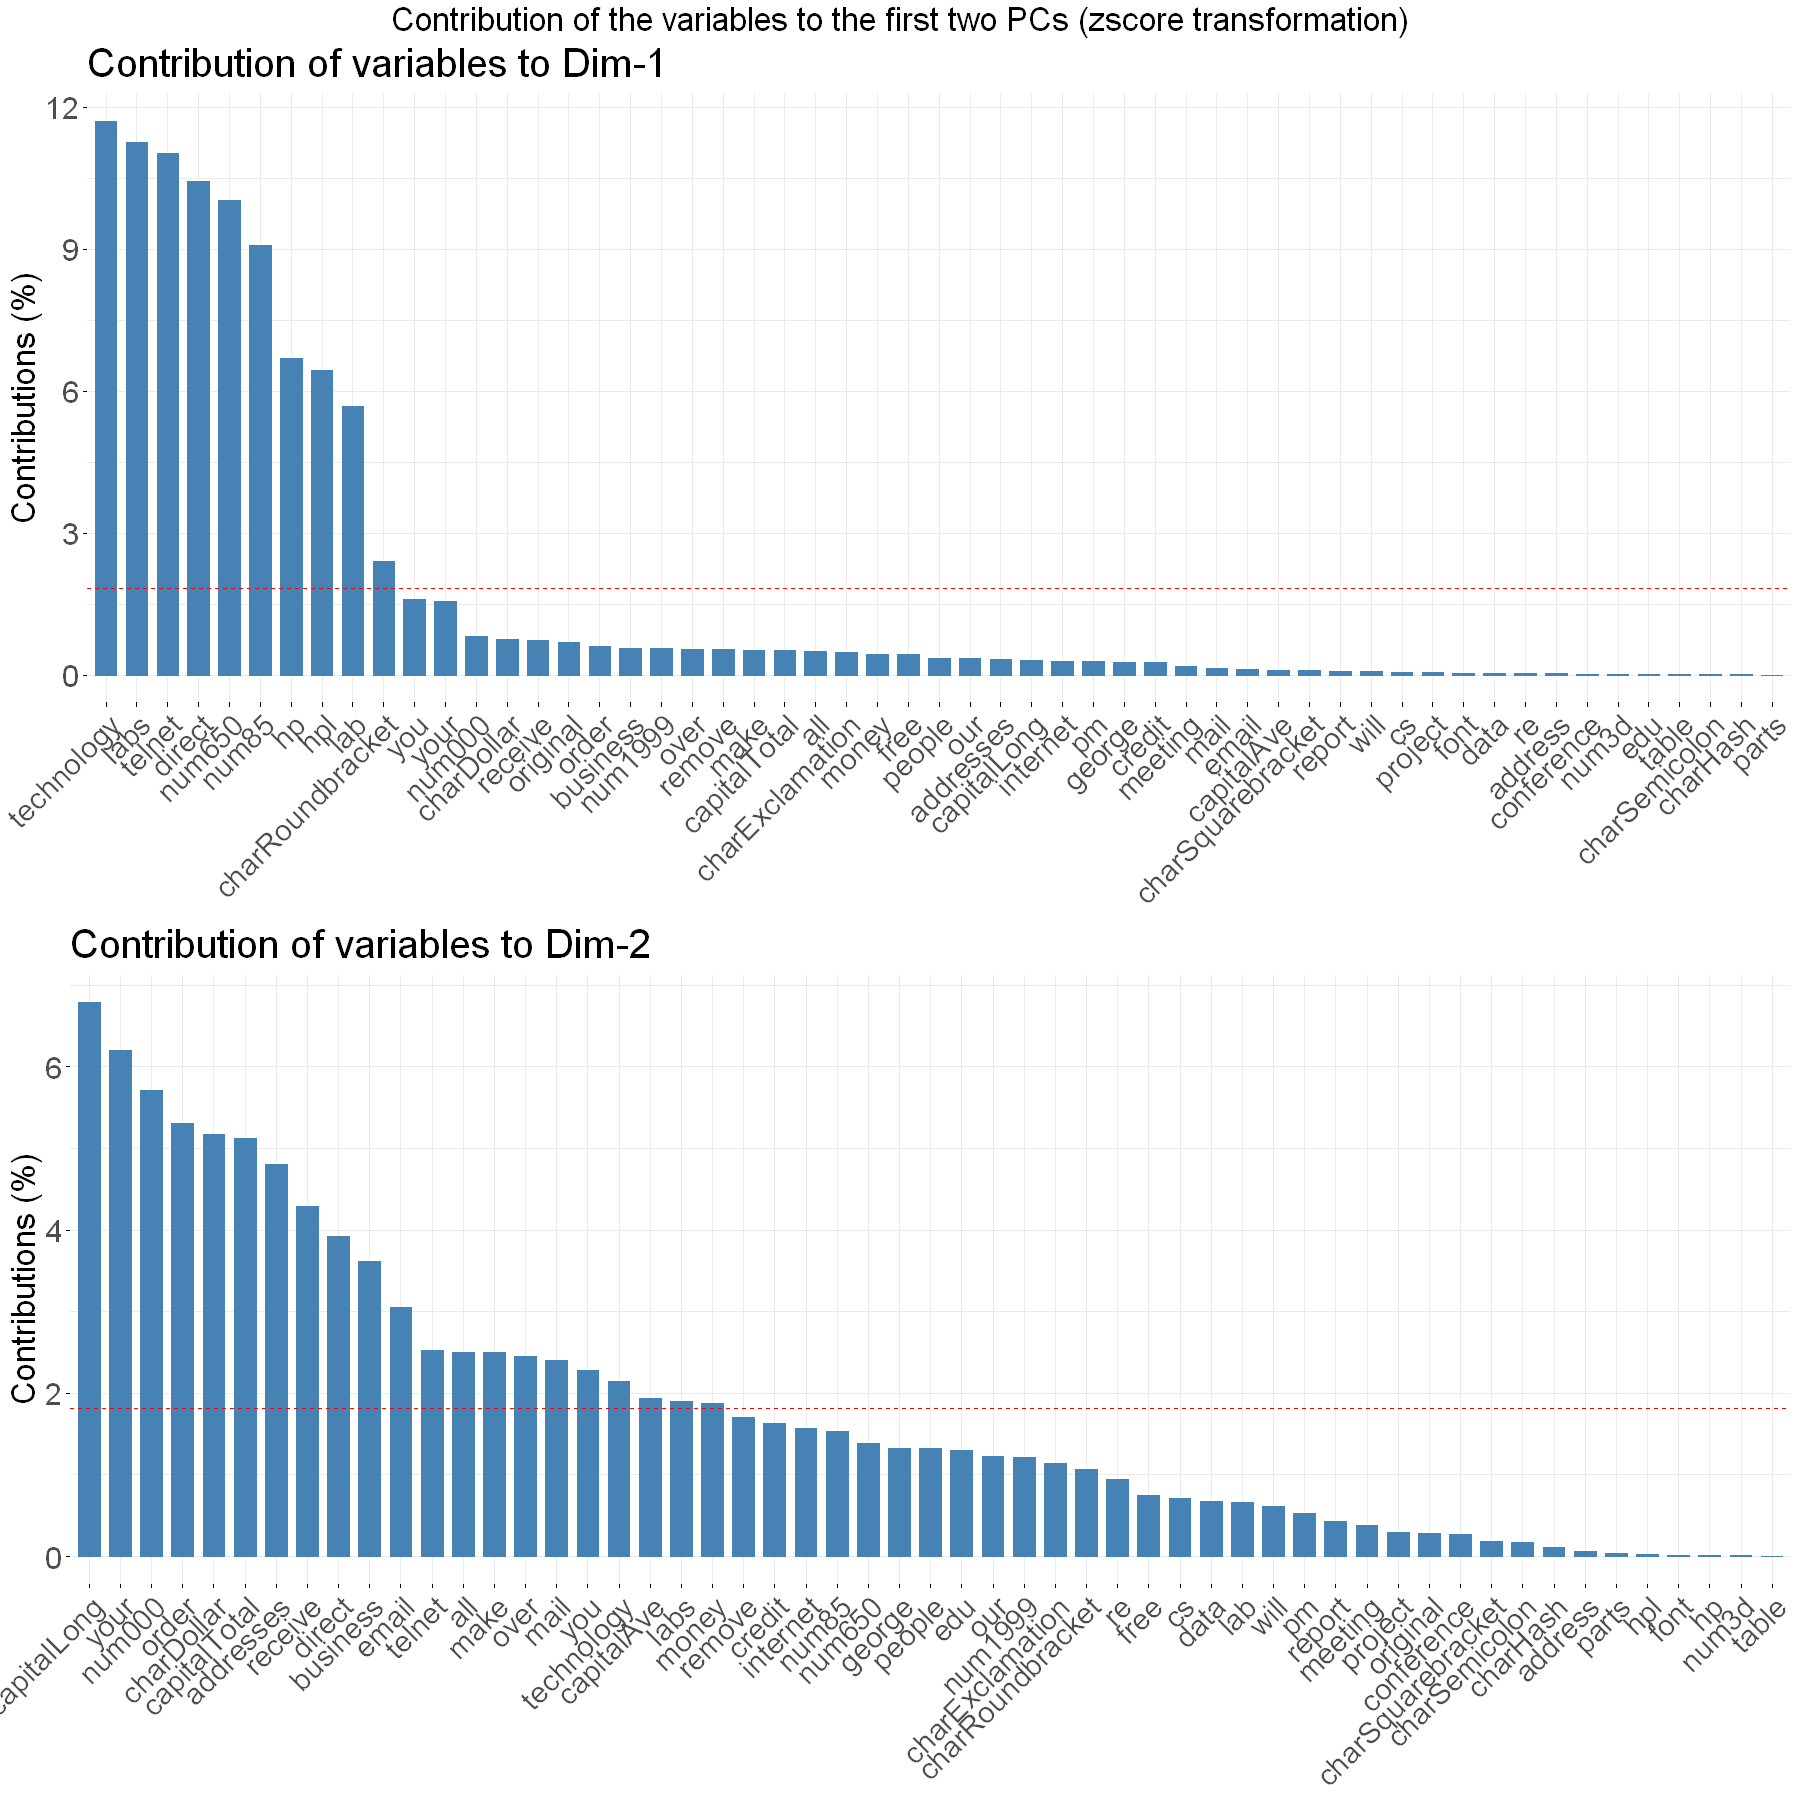

In [40]:
var1 <- fviz_contrib(pca_scaled, choice="var", axes=1) +
    theme(
        plot.title = element_text(size = 24),
        axis.title = element_text(size = 20),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18))
var2 <- fviz_contrib(pca_scaled, choice="var", axes=2) +
    theme(
        plot.title = element_text(size = 24),
        axis.title = element_text(size = 20),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18))
grid.arrange(var1, var2, ncol=1, top=textGrob("Contribution of the variables to the first two PCs (zscore transformation)", gp=gpar(fontsize=20)))

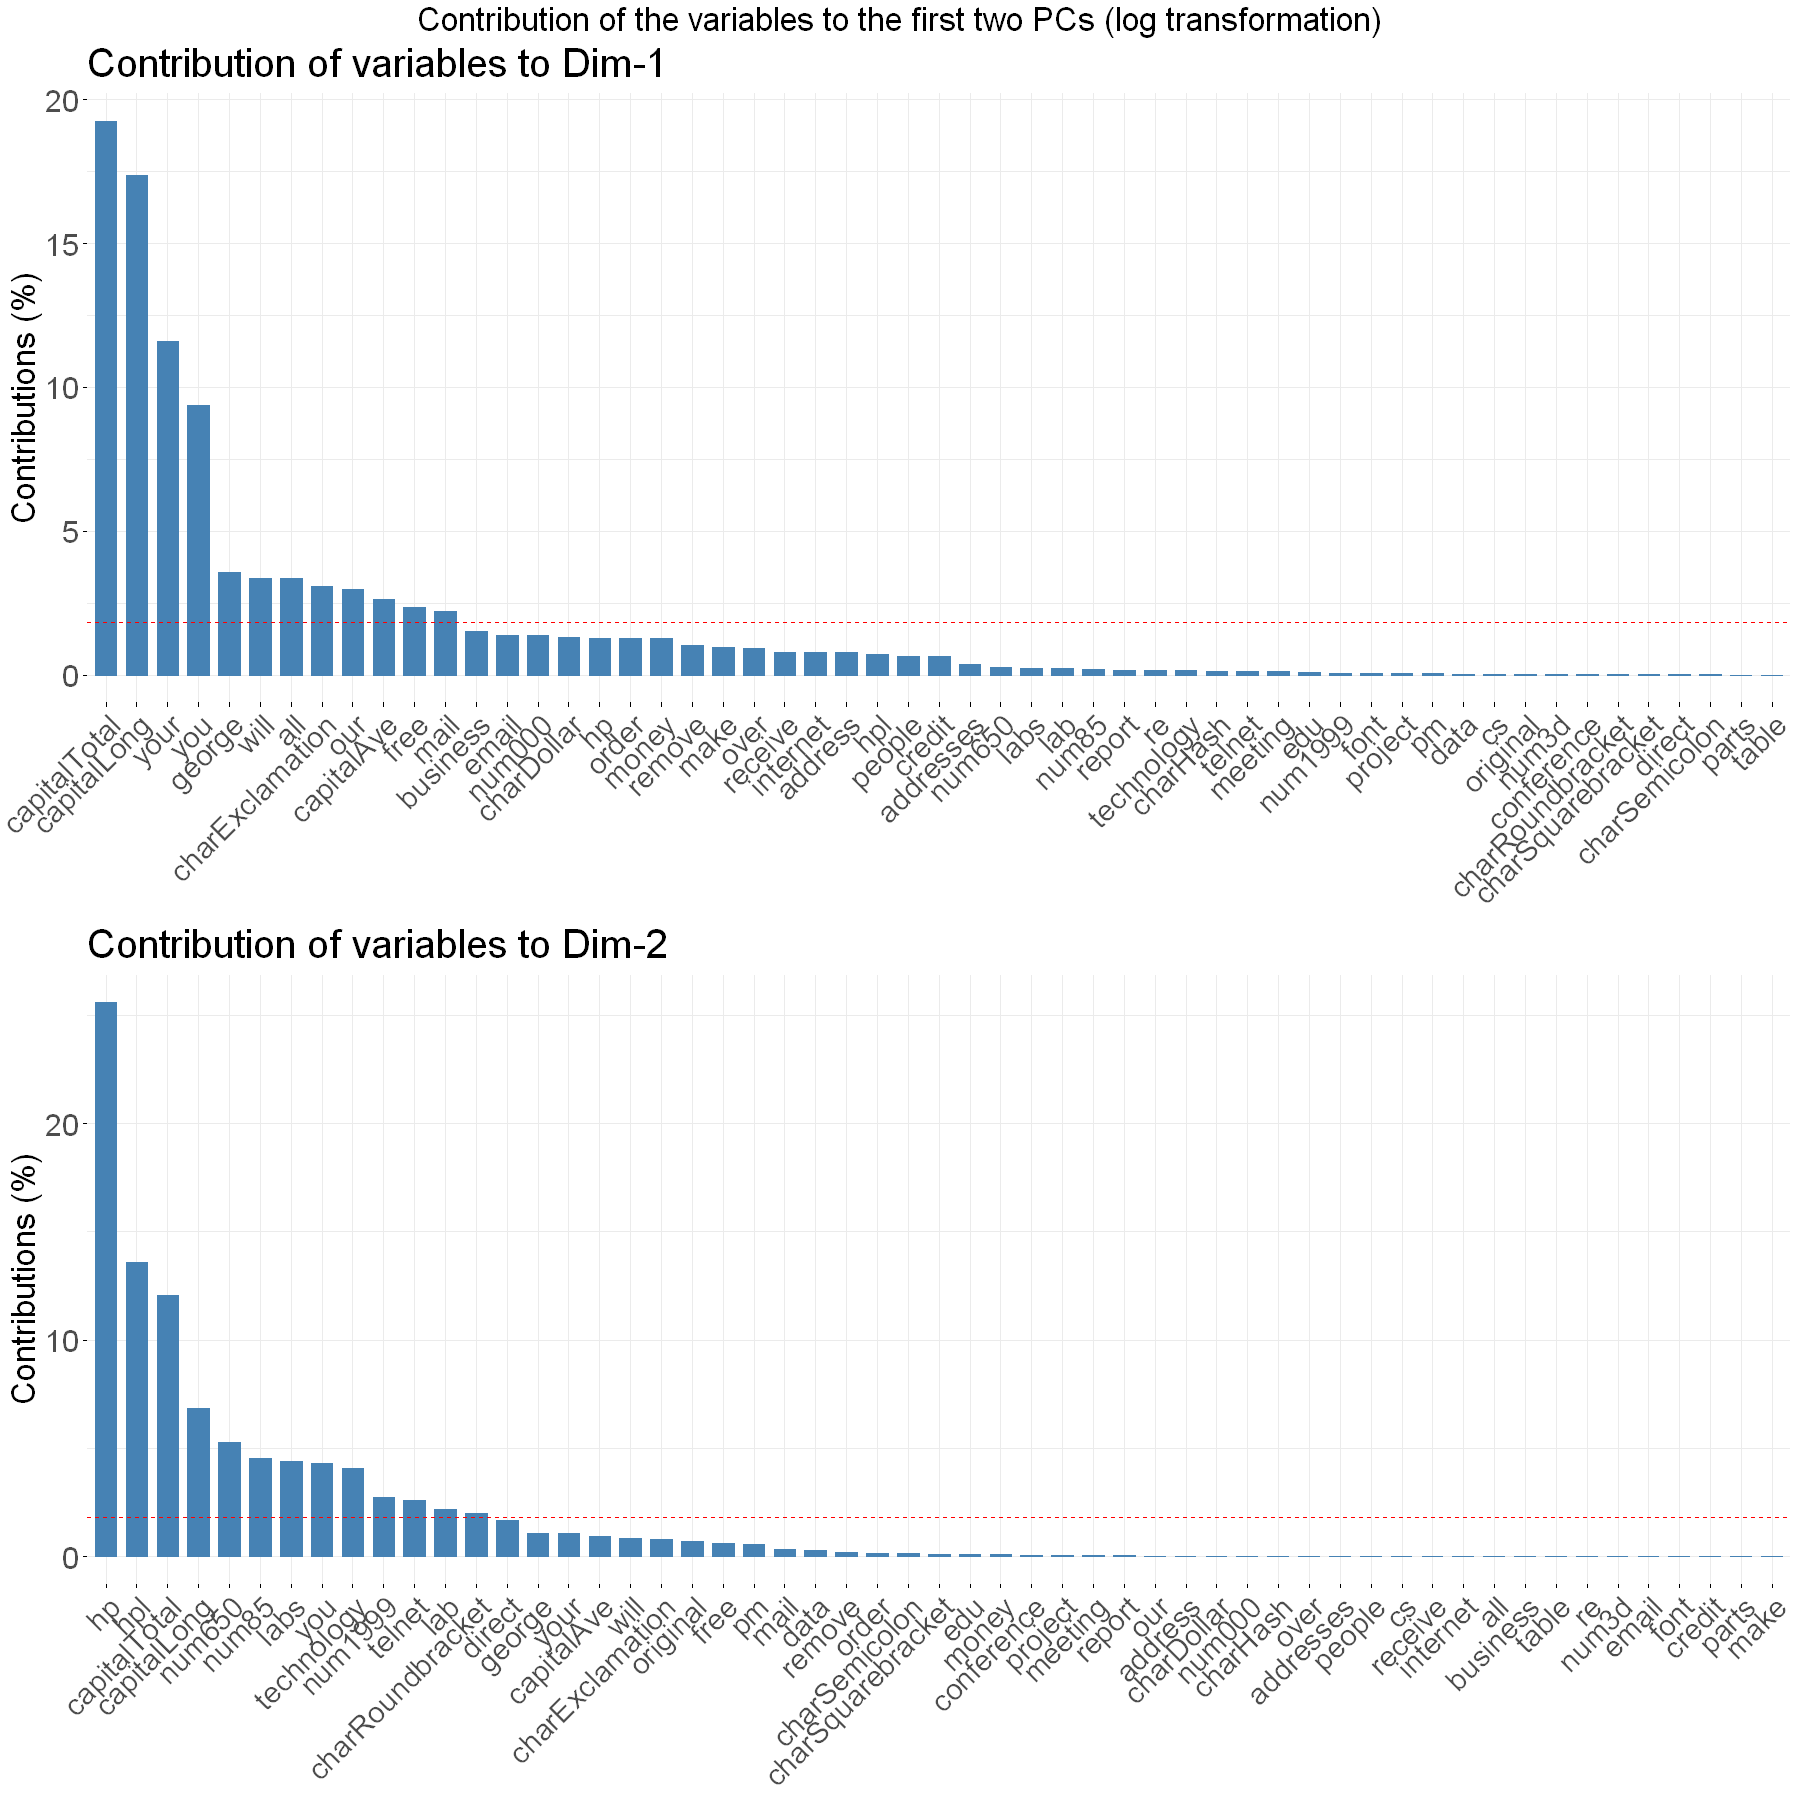

In [44]:
var1 <- fviz_contrib(pca_log, choice="var", axes=1) +
    theme(
        plot.title = element_text(size = 24),
        axis.title = element_text(size = 20),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18))
var2 <- fviz_contrib(pca_log, choice="var", axes=2) +
    theme(
        plot.title = element_text(size = 24),
        axis.title = element_text(size = 20),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18))
grid.arrange(var1, var2, ncol=1, top=textGrob("Contribution of the variables to the first two PCs (log transformation)", gp=gpar(fontsize=20)))

In [17]:
var_proportion <- cumsum(summary(pca_scaled)$importance[2,])
as.data.frame(var_proportion)

,var_proportion
,<dbl>
PC1,0.09385
PC2,0.15104
PC3,0.18721
PC4,0.21653
PC5,0.24443
PC6,0.27102
PC7,0.29672
PC8,0.32155
PC9,0.34509


In [18]:
var_proportion <- cumsum(summary(pca_log)$importance[2,])
as.data.frame(var_proportion)

,var_proportion
,<dbl>
PC1,0.22433
PC2,0.33805
PC3,0.40110
PC4,0.44389
PC5,0.48244
PC6,0.51381
PC7,0.54157
PC8,0.56704
PC9,0.59087


In [56]:
sd_scaled <- mean(pca_scaled$sdev)
sd_log <- mean(pca_log$sdev)

In [57]:
scaled_reject <- which(pca_scaled$sdev < sd_scaled)
log_reject <- which(pca_log$sdev < sd_log)

In [60]:
pca_scores_scaled <- data.frame(pca_scaled$x[, -scaled_reject])
pca_scores_log <- data.frame(pca_log$x[, -log_reject])

In [27]:
clust_plot_scaled <- fviz_nbclust(pca_scores_scaled, FUNcluster = kmeans, method = "silhouette", nstart=10) +
    theme(
        plot.title = element_text(size = 18),
        axis.title = element_text(size = 16),         
        axis.text.x = element_text(size = 14),        
        axis.text.y = element_text(size = 14)) +
    ggtitle("Z-score transformation")
clust_plot_log <- fviz_nbclust(pca_scores_log, FUNcluster = kmeans, method = "silhouette", nstart=10) +
    theme(
        plot.title = element_text(size = 18),
        axis.title = element_text(size = 16),         
        axis.text.x = element_text(size = 14),        
        axis.text.y = element_text(size = 14)) +
    ggtitle("Log transformation")

Warning message:
"'medpolish()' nie zbiegł się w 10 iteracjach"
Warning message:
"'medpolish()' nie zbiegł się w 10 iteracjach"


In [28]:
options(repr.plot.width = 15, repr.plot.height = 15)

In [29]:
png('proj2_plots/kmeans_clust_num.png', width=1500, height=1500)
grid.arrange(clust_plot_scaled, clust_plot_log, ncol=1, top=textGrob("Optimal number of clusters (silhouette) for k-means", gp=gpar(fontsize=20)))
dev.off()

png 
  2

In [23]:
clust_plot_scaled <- fviz_nbclust(pca_scores_scaled, FUNcluster = cluster::pam, method = "silhouette") +
    theme(
        plot.title = element_text(size = 18),
        axis.title = element_text(size = 16),         
        axis.text.x = element_text(size = 14),        
        axis.text.y = element_text(size = 14)) +
    ggtitle("Z-score transformation")
clust_plot_log <- fviz_nbclust(pca_scores_log, FUNcluster = cluster::pam, method = "silhouette") +
    theme(
        plot.title = element_text(size = 18),
        axis.title = element_text(size = 16),         
        axis.text.x = element_text(size = 14),        
        axis.text.y = element_text(size = 14)) +
    ggtitle("Log transformation")

In [24]:
png('proj2_plots/pam_clust_num.png', width=1500, height=1500)
grid.arrange(clust_plot_scaled, clust_plot_log, ncol=1, top=textGrob("Optimal number of clusters (silhouette) for PAM", gp=gpar(fontsize=20)))
dev.off()

png 
  2

In [99]:
agnes_scaled <- agnes(spam_scaled[, -56], method="average")

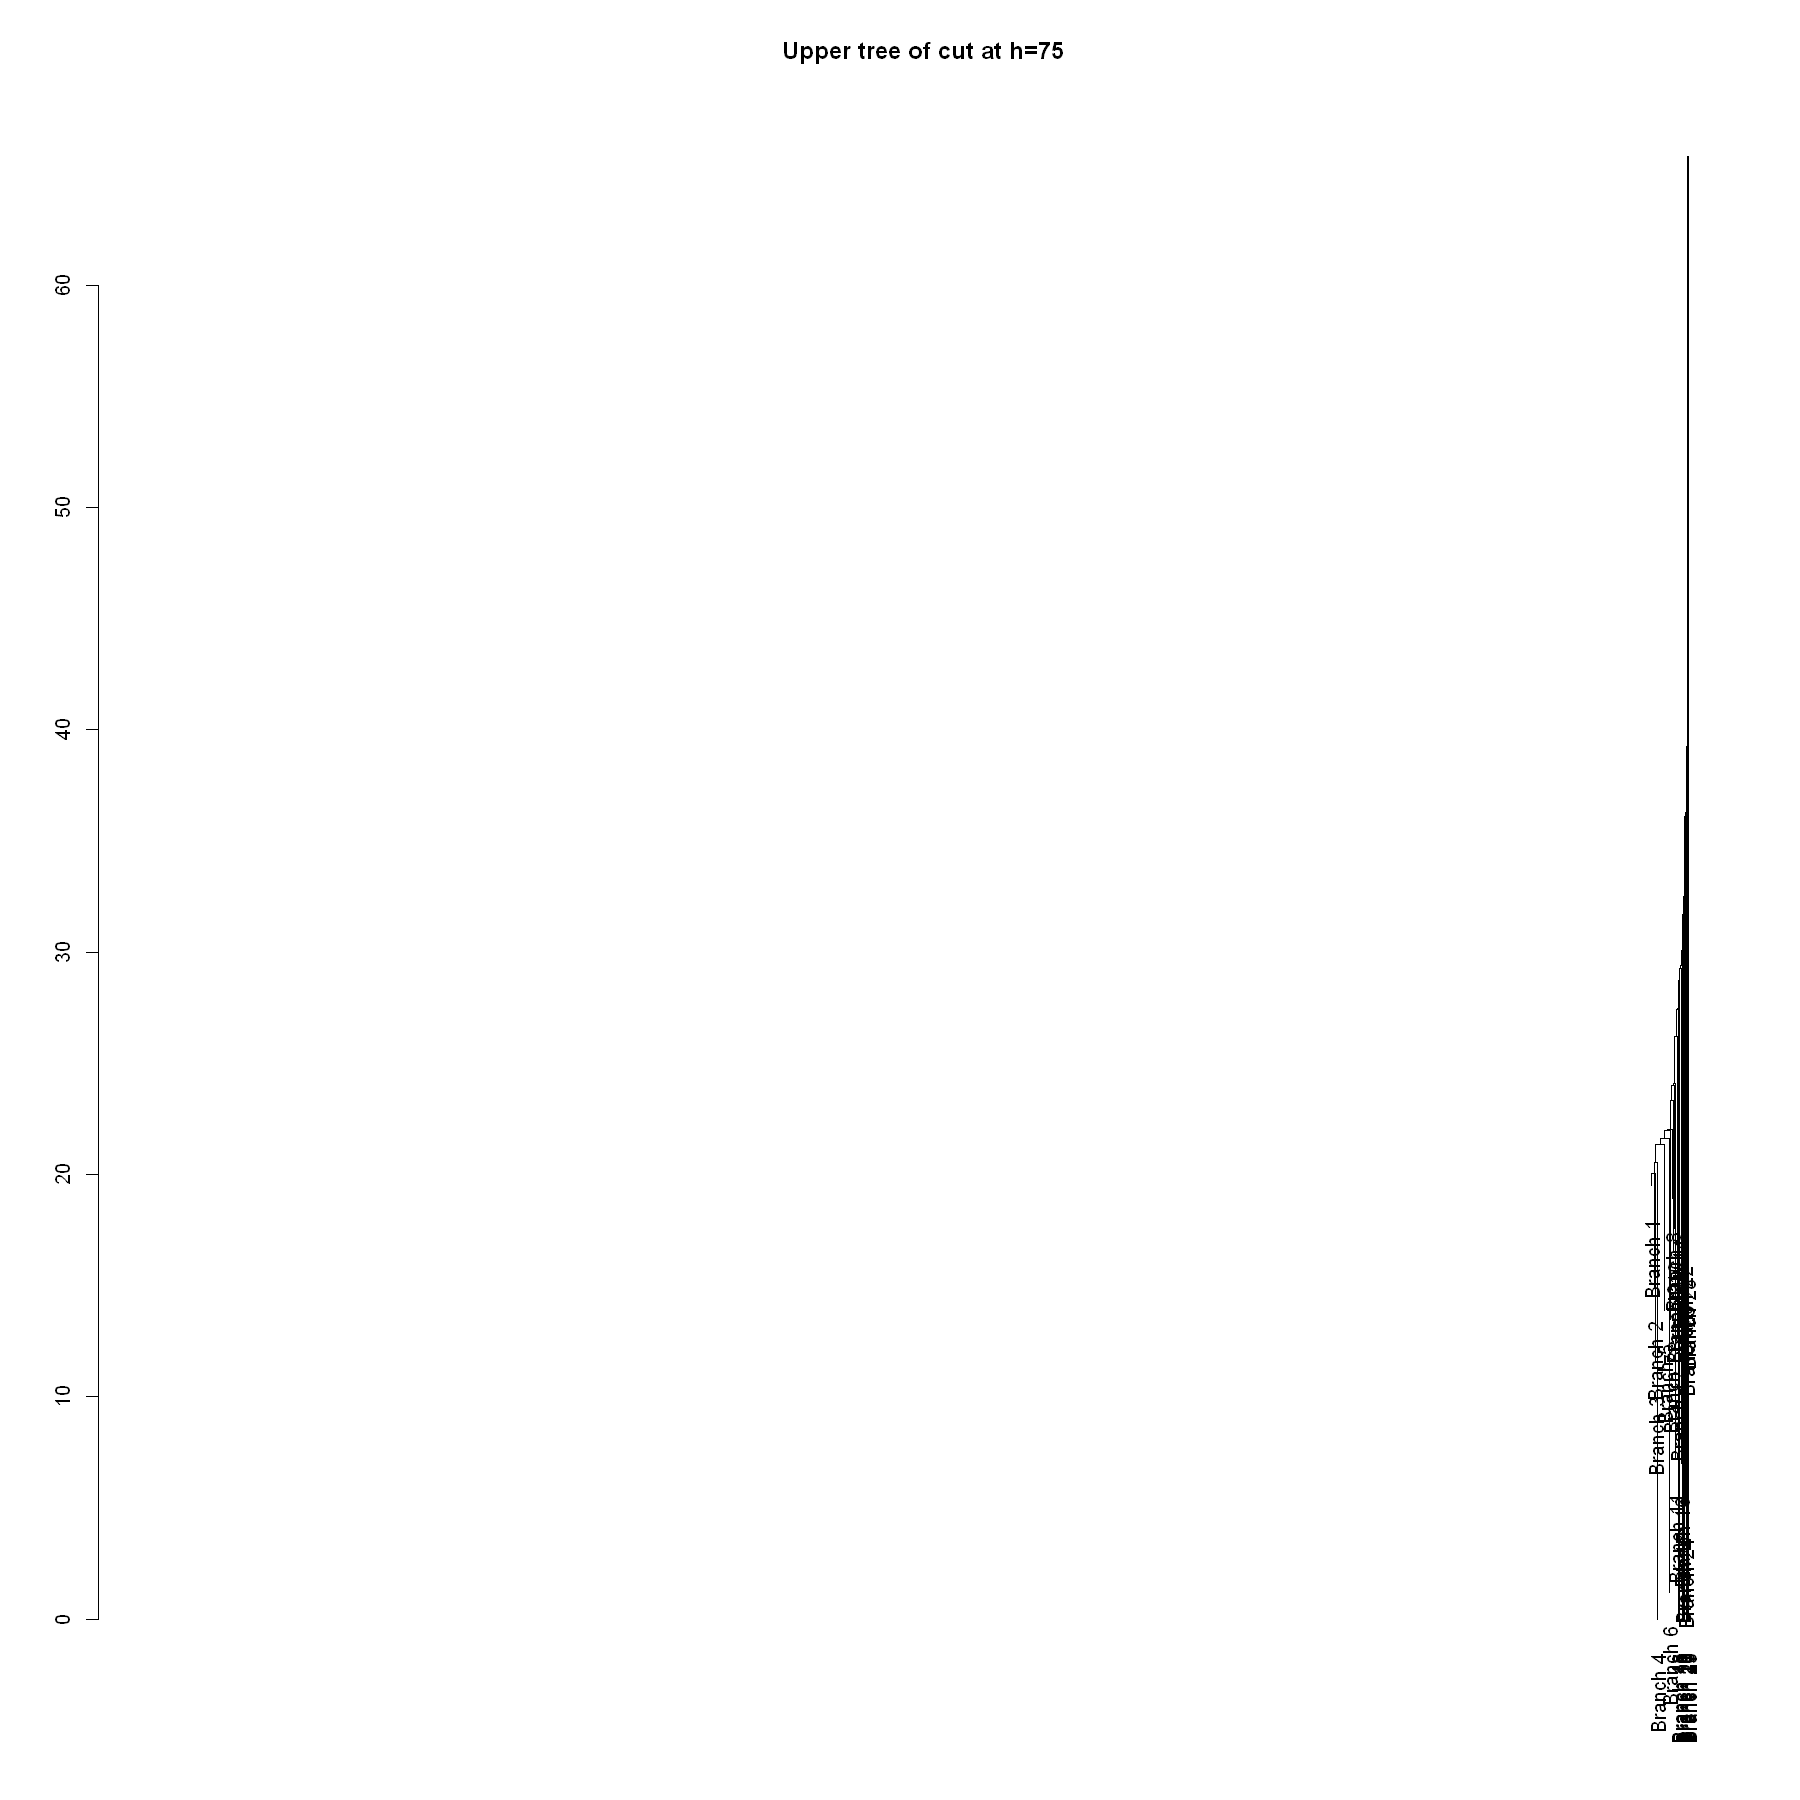

In [111]:
options(repr.plot.width = 40, repr.plot.height = 8)
# png('dupa.png', width=4000, height=800)
pltree(agnes_scaled, main="Dendrogram of AGNES (no transformation)", hang=0, labels=FALSE, xlab='spam', type="triangle")
# dev.off()

### Clustering

In [14]:
set.seed(123)

In [15]:
k_kmeans <- 2
k_kmeans_scaled <- 4
k_kmeans_log <- 3
k_pam <- 2
k_pam_scaled <- 4
k_pam_log <- 3

In [16]:
kmeans_clust <- kmeans(pca_scores, centers = k_kmeans)
kmeans_clust_scaled <- kmeans(pca_scores_scaled, centers = k_kmeans_scaled)
kmeans_clust_log <- kmeans(pca_scores_log, centers = k_kmeans_log)

In [ ]:
pam_clust <- pam(pca_scores, k = k_pam)
pam_clust_scaled <- pam(pca_scores_scaled, k = k_pam_scaled)
pam_clust_log <- pam(pca_scores_log, k = k_pam_log)

In [22]:
options(repr.plot.width = 13, repr.plot.height = 10)

In [37]:
kmeans_results <- cbind(pca_scores, kmeans_clust$cluster, spam$type)
colnames(kmeans_results) <- c("PC1", "PC2", "cluster", "type")
kmeans_results$cluster = as.factor(kmeans_results$cluster)

In [34]:
table(kmeans_results$cluster, kmeans_results$type)

   
    nonspam spam
  1      53  191
  2    2735 1622

Warning message:
"Removed 9 rows containing missing values (`geom_point()`)."


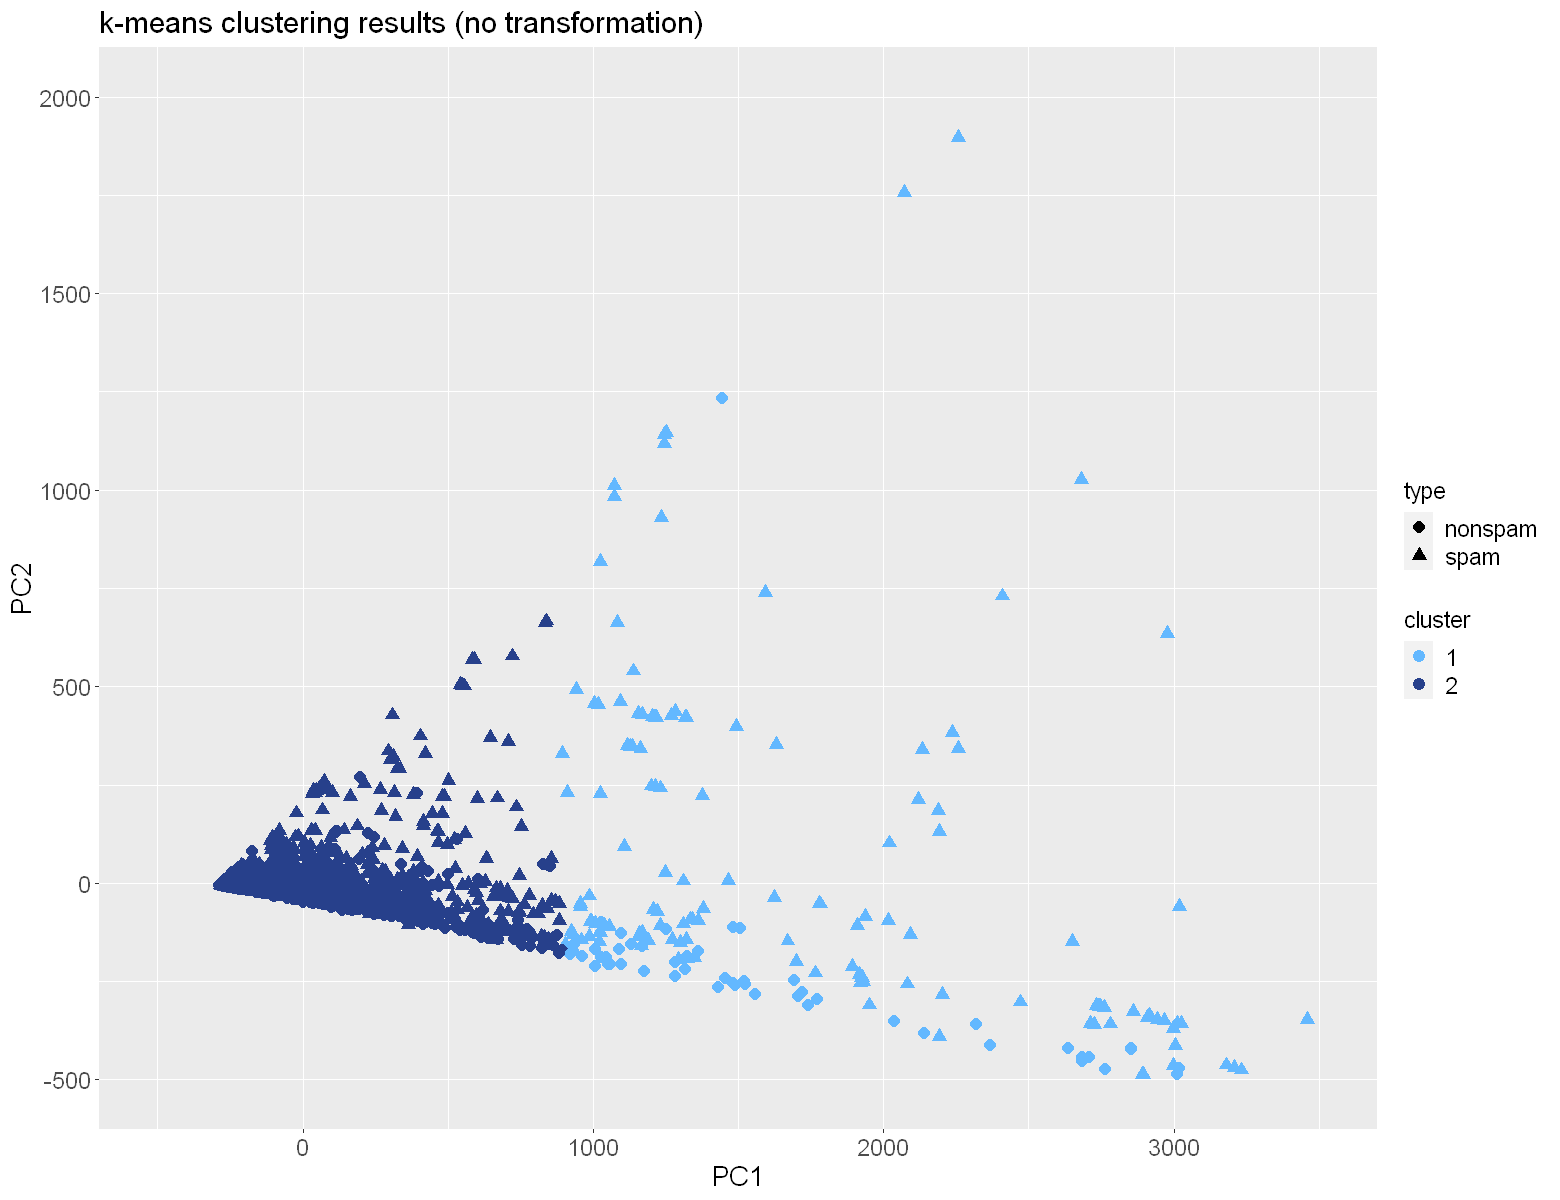

In [48]:
ggplot(kmeans_results, aes(x=PC1, y=PC2, colour=cluster)) +
geom_point(aes(shape=type), size=3) + 
scale_color_manual(values = c("steelblue1", "royalblue4")) +
scale_x_continuous(limits = c(-500, 3500)) +
scale_y_continuous(limits = c(-500, 2000)) +
ggtitle("k-means clustering results (no transformation)") +
theme(
    plot.title = element_text(size = 18),
    axis.title = element_text(size = 16),         
    axis.text.x = element_text(size = 14),        
    axis.text.y = element_text(size = 14),
    legend.text = element_text(size = 14),        
    legend.title = element_text(size = 14))

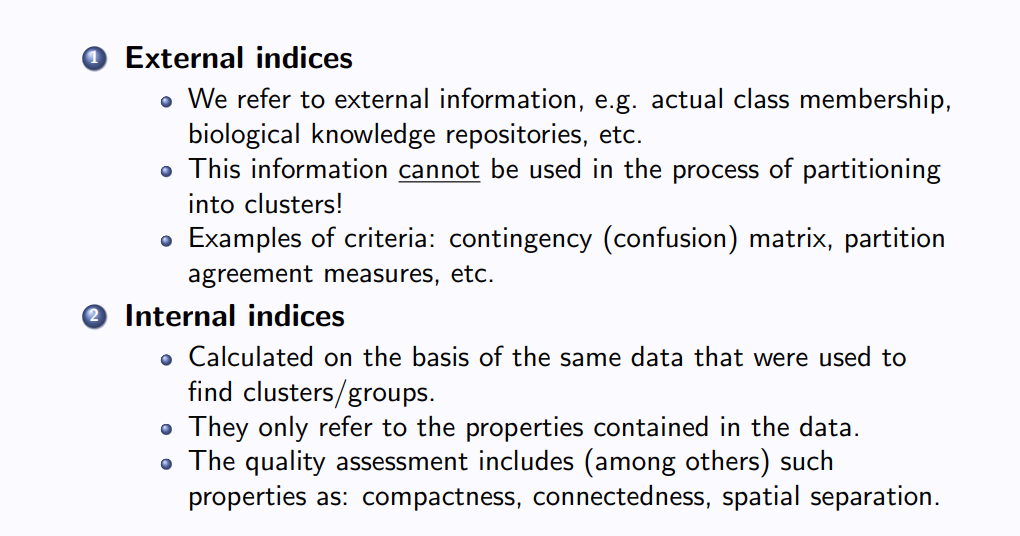